In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from collections import Counter
from cycler import cycler

In [4]:
csv_test_path = "test.csv"
csv_train_path = "train.csv"
# csv_test_path = "/content/drive/MyDrive/ci_minor_project/test.csv"
# csv_train_path = "/content/drive/MyDrive/ci_minor_project/train.csv"

In [5]:
activity_mapping = {'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

In [6]:
train_dataset = pd.read_csv(csv_train_path)
train_dataset["Output"] = [activity_mapping[item] for item in train_dataset.Activity]
train_dataset = train_dataset.sample(frac=1)
train_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
3540,0.239954,-0.014767,-0.053588,-0.304710,0.019941,-0.294556,-0.327785,-0.022903,-0.305531,-0.077962,...,0.352722,-0.624337,0.759510,-0.143668,-0.702384,0.280569,0.114628,17,WALKING,3
5599,0.338581,-0.044625,-0.124532,-0.298288,-0.113891,-0.298233,-0.338590,-0.102055,-0.303844,-0.141571,...,-0.465423,0.844262,0.176293,-0.048267,-0.851112,0.168124,-0.061229,26,WALKING,3
4934,0.279404,-0.012728,-0.100741,-0.992912,-0.978831,-0.955350,-0.993922,-0.980436,-0.951011,-0.931796,...,-0.075831,-0.622443,-0.403529,0.130279,-0.890313,0.031239,0.061971,23,SITTING,1
480,0.358100,-0.072325,-0.103495,0.233087,0.243770,-0.331876,0.195727,0.316939,-0.333388,0.444488,...,-0.454872,-0.408455,0.238059,-0.127503,-0.752083,0.245234,0.108263,3,WALKING_DOWNSTAIRS,4
1046,0.279153,-0.015008,-0.107792,-0.993500,-0.989654,-0.983693,-0.994455,-0.989260,-0.982155,-0.935517,...,-0.173797,-0.043948,0.335188,0.149010,-0.821794,0.111358,-0.111193,6,SITTING,1


In [7]:
test_dataset = pd.read_csv(csv_test_path)
test_dataset["Output"] = [activity_mapping[item] for item in test_dataset.Activity]
test_dataset = test_dataset.sample(frac=1)
test_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
518,0.285550,-0.072470,-0.057244,-0.940902,-0.627113,-0.787298,-0.950858,-0.625723,-0.774093,-0.823990,...,-0.007420,0.215960,-0.058753,-0.019139,-0.916244,0.051212,-0.023042,4,SITTING,1
1920,0.278651,-0.017391,-0.107386,-0.992930,-0.993318,-0.994818,-0.993659,-0.993241,-0.994984,-0.933950,...,-0.024437,0.584480,-0.052682,0.610425,0.439987,-0.727494,-0.246991,18,LAYING,0
2465,0.265656,-0.015345,-0.108900,-0.994687,-0.993189,-0.983637,-0.995542,-0.993232,-0.984737,-0.938670,...,-0.064328,0.195868,0.693428,-0.919796,0.412824,-0.636688,-0.338492,20,LAYING,0
1396,0.273637,0.005818,-0.121756,-0.961813,-0.712939,-0.905021,-0.971583,-0.733172,-0.908818,-0.859188,...,-0.011460,0.007815,0.938593,-0.467316,-0.881028,0.017559,-0.012960,12,SITTING,1
1862,0.284586,0.009560,-0.127466,-0.987178,-0.907089,-0.869253,-0.988715,-0.900716,-0.860351,-0.921330,...,0.049755,-0.083072,-0.566907,-0.890635,-0.838057,0.194527,-0.041538,18,STANDING,2


In [8]:
X_train = train_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_train = train_dataset["Output"]
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train[:5], y_train[:5]

(array([[ 0.23995369, -0.01476688, -0.05358768, ..., -0.70238438,
          0.28056858,  0.11462779],
        [ 0.33858148, -0.04462492, -0.12453206, ..., -0.85111201,
          0.16812352, -0.06122938],
        [ 0.2794038 , -0.01272813, -0.10074129, ..., -0.89031265,
          0.03123949,  0.0619705 ],
        [ 0.3581001 , -0.07232502, -0.10349534, ..., -0.75208303,
          0.24523446,  0.10826278],
        [ 0.279153  , -0.01500772, -0.10779225, ..., -0.82179364,
          0.11135801, -0.11119308]]),
 array([3, 3, 1, 4, 1]))

In [9]:
X_test = test_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_test = test_dataset["Output"]
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test[:5], y_test[:5]

(array([[ 0.2855496 , -0.07247009, -0.05724355, ..., -0.91624431,
          0.05121163, -0.02304199],
        [ 0.27865057, -0.01739076, -0.10738579, ...,  0.43998742,
         -0.72749398, -0.24699062],
        [ 0.26565644, -0.01534466, -0.10889986, ...,  0.41282392,
         -0.63668823, -0.33849195],
        [ 0.27363707,  0.00581753, -0.12175588, ..., -0.88102784,
          0.01755914, -0.01295954],
        [ 0.28458557,  0.0095602 , -0.12746582, ..., -0.83805746,
          0.19452695, -0.04153752]]),
 array([1, 0, 0, 1, 2]))

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [11]:
# Group and count main names of columns
both_df = pd.concat([train_dataset, test_dataset], axis=0).reset_index(drop=True)
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


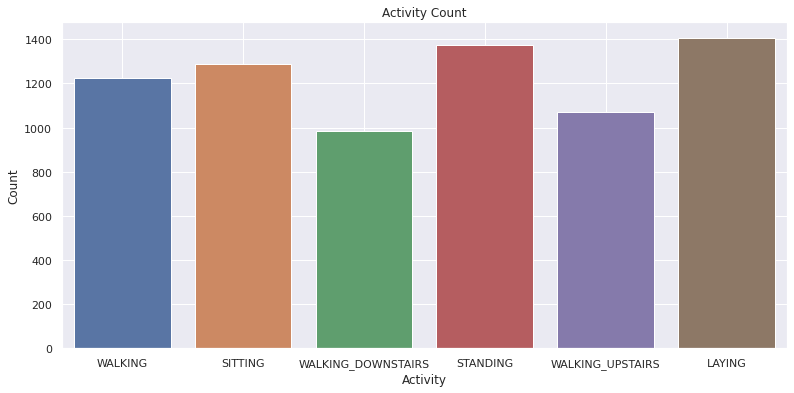

In [12]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train_dataset)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

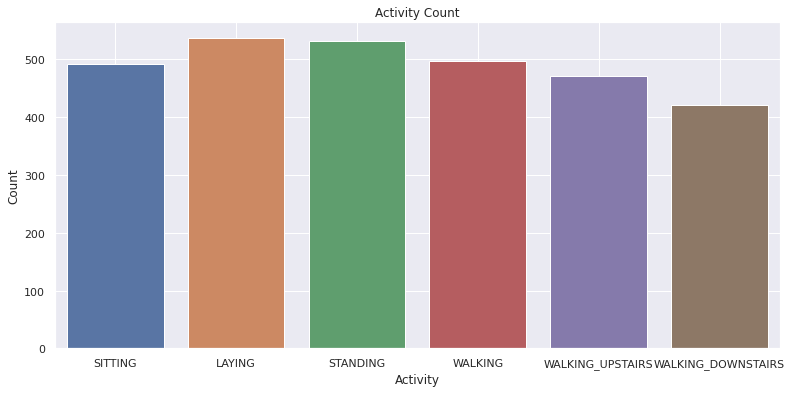

In [13]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = test_dataset)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [58]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(561,), activation='relu'),
    keras.layers.Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
230/230 [==============================] - 2s 8ms/step - loss: 0.4472 - accuracy: 0.8381
Epoch 2/100
230/230 [==============================] - 1s 4ms/step - loss: 0.1714 - accuracy: 0.9377
Epoch 3/100
230/230 [==============================] - 1s 4ms/step - loss: 0.1285 - accuracy: 0.9532
Epoch 4/100
230/230 [==============================] - 1s 6ms/step - loss: 0.0987 - accuracy: 0.9650
Epoch 5/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9694
Epoch 6/100
230/230 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9709
Epoch 7/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9755
Epoch 8/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0634 - accuracy: 0.9771
Epoch 9/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0591 - accuracy: 0.9778
Epoch 10/100
230/230 [==============================] - 1s 4ms/step - loss: 0.0588 - accura

In [15]:
model.evaluate(X_test,y_test)

93/93 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.9522


[0.2461775690317154, 0.9521547555923462]

In [56]:
import shap

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 500, replace=False)]

# explain predictions of the model
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(X_test[np.random.choice(X_test.shape[0], 20, replace=False)])

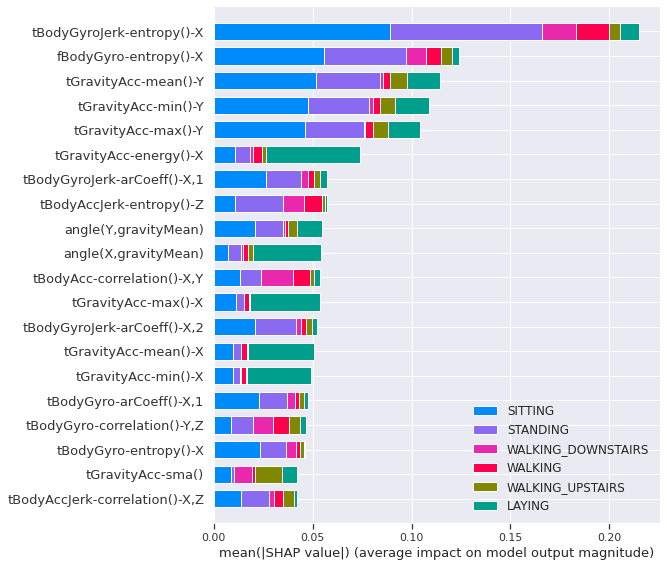

In [55]:
# plot the feature attributions
shap.summary_plot(shap_values, -X_test[1:5], class_names = list(activity_mapping.keys()), feature_names = test_dataset.columns.values)

In [ ]:
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# %tensorboard --logdir logs/fit

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def kFoldCrossValidation(X_dataset, y_dataset, k = 3):
    iteration_cnt = 0
    k_fold = KFold(n_splits=k)
    for train_indices, test_indices in k_fold.split(X_dataset):
        iteration_cnt += 1
        print(f"\n------------------- ITERATION {iteration_cnt} ---------------------------")
        model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(561,), activation='relu'),
            keras.layers.Dense(6, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        model.fit(X_dataset[train_indices], y_dataset[train_indices], epochs=10, callbacks=[tensorboard_callback])
        model.evaluate(X_dataset[test_indices], y_dataset[test_indices])

In [ ]:
# kFoldCrossValidation(X_train, y_train, 10)